In [1]:
# .xlsx файл читается, если скачать внешний пакет openpyxl

#!pip install openpyxl
#!conda install -c conda-forge geopandas -y

In [58]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

from matplotlib.patches import FancyBboxPatch
#from topojson import Topology

## Load

In [3]:
# GeoJSON из .txt
with open('1c3c1c94647149b68a435272679656cf.txt', 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

df = pd.read_excel('57d6d3dffde04a2696d59623d5aa92b2.xlsx')

In [4]:
df.head(3)

,fo,fo_stud_gos_all,fo_stud_negos_all,fo_stud_all
0,Центральный федеральный округ,1185.482,367.371,1552.853
1,Приволжский федеральный округ,778.299,51.144,829.443
2,Сибирский федеральный округ,461.712,27.011,488.723


In [5]:
geojson_data['objects'].keys()

dict_keys(['geo'])

Полученный файл json оказался не GeoJSON, а TopoJSON, а geopandas напрямую не поддерживает TopoJSON. Конвертируем файл в GeoJSON на сайте https://mapshaper.org/. Сохраним под именем converted.geojson.

Рассмотрим полученный файл.

In [6]:
gdf = gpd.read_file('converted.geojson')

print(gdf.columns)
print(gdf.head())

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'NL_NAME_1', 'VARNAME_1',
       'TYPE_1', 'ENGTYPE_1', 'geometry'],
      dtype='object')
   ID_0  ISO  NAME_0  ID_1             NAME_1                       NL_NAME_1  \
0   186  RUS  Russia    28  Karachay-Cherkess  ?????????-????????? ??????????   
1   186  RUS  Russia    29            Karelia              ?????????? ???????   
2   186  RUS  Russia    30           Kemerovo             ??????????? ???????   
3   186  RUS  Russia    31         Khabarovsk                ??????????? ????   
4   186  RUS  Russia    32            Khakass              ?????????? ???????   

                                           VARNAME_1      TYPE_1  ENGTYPE_1  \
0  Karaçay-Çerkes|Karachay-Cherkessiya|Karachayev...  Respublika   Republic   
1  Karelian A.S.S.R.|Karelo-Finnish A.S.S.R.|Kare...  Respublika   Republic   
2                                Kemerovskaya Oblast      Oblast     Region   
3                                  Khabarovskiy Kray    

In [7]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID_0       85 non-null     int32   
 1   ISO        85 non-null     object  
 2   NAME_0     85 non-null     object  
 3   ID_1       85 non-null     int32   
 4   NAME_1     85 non-null     object  
 5   NL_NAME_1  81 non-null     object  
 6   VARNAME_1  84 non-null     object  
 7   TYPE_1     85 non-null     object  
 8   ENGTYPE_1  85 non-null     object  
 9   geometry   85 non-null     geometry
dtypes: geometry(1), int32(2), object(7)
memory usage: 6.1+ KB


## Regions

In [8]:
sorted(gdf['NAME_1'].unique())

['Adygey',
 'Altay',
 'Amur',
 "Arkhangel'sk",
 "Astrakhan'",
 'Bashkortostan',
 'Belgorod',
 'Bryansk',
 'Buryat',
 'Chechnya',
 'Chelyabinsk',
 'Chukot',
 'Chuvash',
 'City of St. Petersburg',
 'Crimea',
 'Dagestan',
 'Gorno-Altay',
 'Ingush',
 'Irkutsk',
 'Ivanovo',
 'Kabardin-Balkar',
 'Kaliningrad',
 'Kalmyk',
 'Kaluga',
 'Kamchatka',
 'Karachay-Cherkess',
 'Karelia',
 'Kemerovo',
 'Khabarovsk',
 'Khakass',
 'Khanty-Mansiy',
 'Kirov',
 'Komi',
 'Kostroma',
 'Krasnodar',
 'Krasnoyarsk',
 'Kurgan',
 'Kursk',
 'Leningrad',
 'Lipetsk',
 'Maga Buryatdan',
 'Mariy-El',
 'Mordovia',
 'Moscow City',
 'Moskva',
 'Murmansk',
 'Nenets',
 'Nizhegorod',
 'North Ossetia',
 'Novgorod',
 'Novosibirsk',
 'Omsk',
 'Orel',
 'Orenburg',
 'Penza',
 "Perm'",
 "Primor'ye",
 'Pskov',
 'Rostov',
 "Ryazan'",
 'Sakha',
 'Sakhalin',
 'Samara',
 'Saratov',
 "Sevastopol'",
 'Smolensk',
 "Stavropol'",
 'Sverdlovsk',
 'Tambov',
 'Tatarstan',
 'Tomsk',
 'Tula',
 'Tuva',
 "Tver'",
 "Tyumen'",
 'Udmurt',
 "Ul'yanov

In [9]:
region_to_fo = {
    'Adygey': 'Южный федеральный округ',
    'Altay': 'Сибирский федеральный округ',
    'Amur': 'Дальневосточный федеральный округ',
    "Arkhangel'sk": 'Северо-Западный федеральный округ',
    "Astrakhan'": 'Южный федеральный округ',
    'Bashkortostan': 'Приволжский федеральный округ',
    'Belgorod': 'Центральный федеральный округ',
    'Bryansk': 'Центральный федеральный округ',
    'Buryat': 'Сибирский федеральный округ',
    'Chechnya': 'Северо-Кавказский федеральный округ',
    'Chelyabinsk': 'Уральский федеральный округ',
    'Chukot': 'Дальневосточный федеральный округ',
    'Chuvash': 'Приволжский федеральный округ',
    'City of St. Petersburg': 'Северо-Западный федеральный округ',
    'Crimea': 'Южный федеральный округ',
    'Dagestan': 'Северо-Кавказский федеральный округ',
    'Gorno-Altay': 'Сибирский федеральный округ',
    'Ingush': 'Северо-Кавказский федеральный округ',
    'Irkutsk': 'Сибирский федеральный округ',
    'Ivanovo': 'Центральный федеральный округ',
    'Kabardin-Balkar': 'Северо-Кавказский федеральный округ',
    'Kaliningrad': 'Северо-Западный федеральный округ',
    'Kalmyk': 'Южный федеральный округ',
    'Kaluga': 'Центральный федеральный округ',
    'Kamchatka': 'Дальневосточный федеральный округ',
    'Karachay-Cherkess': 'Северо-Кавказский федеральный округ',
    'Karelia': 'Северо-Западный федеральный округ',
    'Kemerovo': 'Сибирский федеральный округ',
    'Khabarovsk': 'Дальневосточный федеральный округ',
    'Khakass': 'Сибирский федеральный округ',
    'Khanty-Mansiy': 'Уральский федеральный округ',
    'Kirov': 'Приволжский федеральный округ',
    'Komi': 'Северо-Западный федеральный округ',
    'Kostroma': 'Центральный федеральный округ',
    'Krasnodar': 'Южный федеральный округ',
    'Krasnoyarsk': 'Сибирский федеральный округ',
    'Kurgan': 'Уральский федеральный округ',
    'Kursk': 'Центральный федеральный округ',
    'Leningrad': 'Северо-Западный федеральный округ',
    'Lipetsk': 'Центральный федеральный округ',
    'Maga Buryatdan': 'Дальневосточный федеральный округ',
    'Mariy-El': 'Приволжский федеральный округ',
    'Mordovia': 'Приволжский федеральный округ',
    'Moscow City': 'Центральный федеральный округ',
    'Moskva': 'Центральный федеральный округ',
    'Murmansk': 'Северо-Западный федеральный округ',
    'Nenets': 'Северо-Западный федеральный округ',
    'Nizhegorod': 'Приволжский федеральный округ',
    'North Ossetia': 'Северо-Кавказский федеральный округ',
    'Novgorod': 'Северо-Западный федеральный округ',
    'Novosibirsk': 'Сибирский федеральный округ',
    'Omsk': 'Сибирский федеральный округ',
    'Orel': 'Центральный федеральный округ',
    'Orenburg': 'Приволжский федеральный округ',
    'Penza': 'Приволжский федеральный округ',
    "Perm'": 'Приволжский федеральный округ',
    "Primor'ye": 'Дальневосточный федеральный округ',
    'Pskov': 'Северо-Западный федеральный округ',
    'Rostov': 'Южный федеральный округ',
    "Ryazan'": 'Центральный федеральный округ',
    'Sakha': 'Дальневосточный федеральный округ',
    'Sakhalin': 'Дальневосточный федеральный округ',
    'Samara': 'Приволжский федеральный округ',
    'Saratov': 'Приволжский федеральный округ',
    "Sevastopol'": 'Южный федеральный округ',
    'Smolensk': 'Центральный федеральный округ',
    "Stavropol'": 'Северо-Кавказский федеральный округ',
    'Sverdlovsk': 'Уральский федеральный округ',
    'Tambov': 'Центральный федеральный округ',
    'Tatarstan': 'Приволжский федеральный округ',
    'Tomsk': 'Сибирский федеральный округ',
    'Tula': 'Центральный федеральный округ',
    'Tuva': 'Сибирский федеральный округ',
    "Tver'": 'Центральный федеральный округ',
    "Tyumen'": 'Уральский федеральный округ',
    'Udmurt': 'Приволжский федеральный округ',
    "Ul'yanovsk": 'Приволжский федеральный округ',
    'Vladimir': 'Центральный федеральный округ',
    'Volgograd': 'Южный федеральный округ',
    'Vologda': 'Северо-Западный федеральный округ',
    'Voronezh': 'Центральный федеральный округ',
    'Yamal-Nenets': 'Уральский федеральный округ',
    "Yaroslavl'": 'Центральный федеральный округ',
    'Yevrey': 'Дальневосточный федеральный округ',
    'Zabaikalskiy Krai': 'Дальневосточный федеральный округ'
}


In [10]:
print(df.columns)

Index(['fo', 'fo_stud_gos_all', 'fo_stud_negos_all', 'fo_stud_all'], dtype='object')


In [11]:
df.head()

,fo,fo_stud_gos_all,fo_stud_negos_all,fo_stud_all
0,Центральный федеральный округ,1185.482,367.371,1552.853
1,Приволжский федеральный округ,778.299,51.144,829.443
2,Сибирский федеральный округ,461.712,27.011,488.723
3,Северо-Западный федеральный округ,430.238,29.035,459.273
4,Южный федеральный округ,383.413,24.091,407.504


Нам нужно сгруппировать регионы по округам, которые представлены в файле excel

In [12]:
gdf['fo'] = gdf['NAME_1'].map(region_to_fo)

In [13]:
print(gdf[['NAME_1', 'fo']].dropna().head())

              NAME_1                                   fo
0  Karachay-Cherkess  Северо-Кавказский федеральный округ
1            Karelia    Северо-Западный федеральный округ
2           Kemerovo          Сибирский федеральный округ
3         Khabarovsk    Дальневосточный федеральный округ
4            Khakass          Сибирский федеральный округ


In [14]:
merged = gdf.merge(df, on='fo')

In [15]:
merged.head(5)

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,geometry,fo,fo_stud_gos_all,fo_stud_negos_all,fo_stud_all
0,186,RUS,Russia,28,Karachay-Cherkess,?????????-????????? ??????????,Karaçay-Çerkes|Karachay-Cherkessiya|Karachayev...,Respublika,Republic,"POLYGON ((42.87932 43.75001, 42.82537 43.77539...",Северо-Кавказский федеральный округ,203.390,17.450,220.840
1,186,RUS,Russia,29,Karelia,?????????? ???????,Karelian A.S.S.R.|Karelo-Finnish A.S.S.R.|Kare...,Respublika,Republic,"MULTIPOLYGON (((36.6292 64.23868, 36.58625 64....",Северо-Западный федеральный округ,430.238,29.035,459.273
2,186,RUS,Russia,30,Kemerovo,??????????? ???????,Kemerovskaya Oblast,Oblast,Region,"POLYGON ((88.6365 55.42457, 88.71138 55.47821,...",Сибирский федеральный округ,461.712,27.011,488.723
3,186,RUS,Russia,31,Khabarovsk,??????????? ????,Khabarovskiy Kray,Kray,Territory,"MULTIPOLYGON (((141.35295 53.35286, 141.32432 ...",Дальневосточный федеральный округ,177.301,2.103,179.404
4,186,RUS,Russia,32,Khakass,?????????? ???????,Khakassiya|Republic of Khakasia|Khakasskaya A....,Respublika,Republic,"POLYGON ((90.4523 52.16328, 90.48753 52.20255,...",Сибирский федеральный округ,461.712,27.011,488.723


## Map

(np.float64(-198.0),
 np.float64(198.00000000000028),
 np.float64(39.15544281005859),
 np.float64(83.89074554443371))

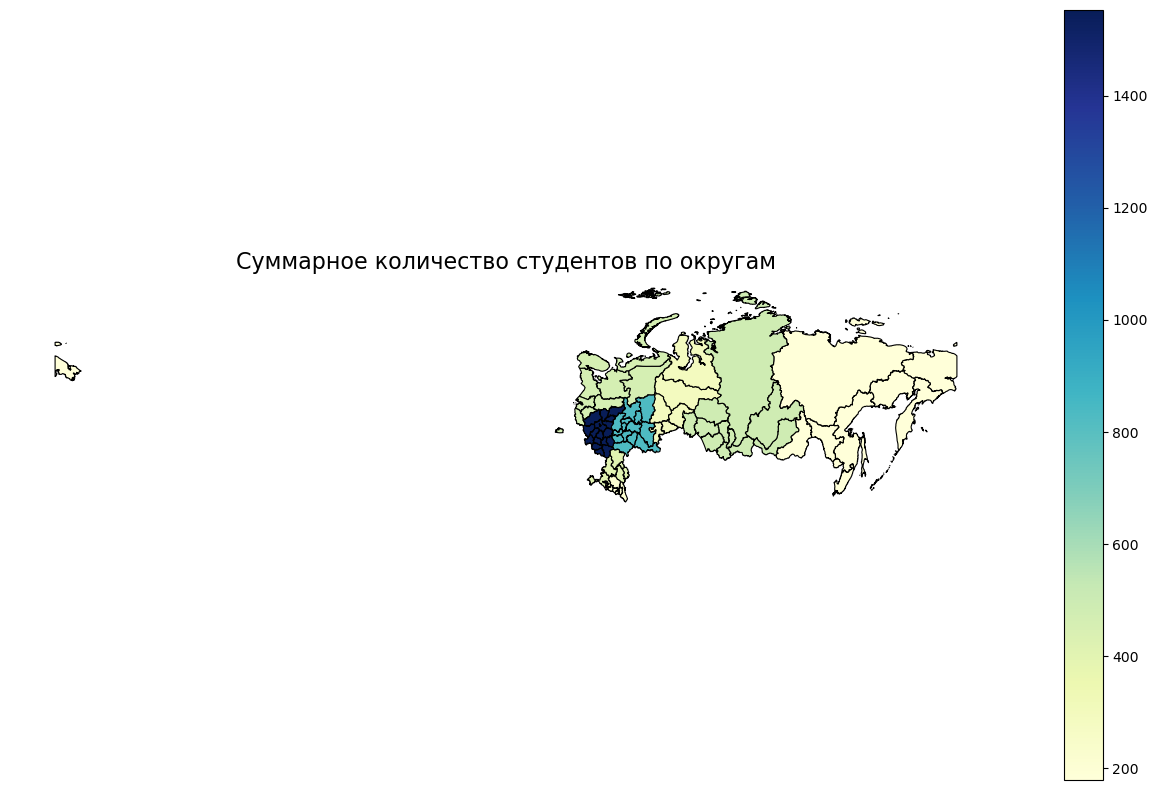

In [16]:
fig, ax = plt.subplots(figsize=(16, 10))

merged.plot(column='fo_stud_all',
            cmap='YlGnBu',
            linewidth=0.8,
            edgecolor='black',
            ax=ax,
            legend=True)

ax.set_title('Суммарное количество студентов по округам', fontsize=16)
ax.axis('off')

## Diagrams

Отсечем кусок Чукотки, который "оборачивается" налево через 180° и ломает читаемость карты. Это происходит потому что карта России попадает в проекции на карту в 20-180 градусов, а эта часть региона 180+. Отсечем его на карте, так как нам нужна читаемость регионов и данных на них.

(40.0, 85.0)

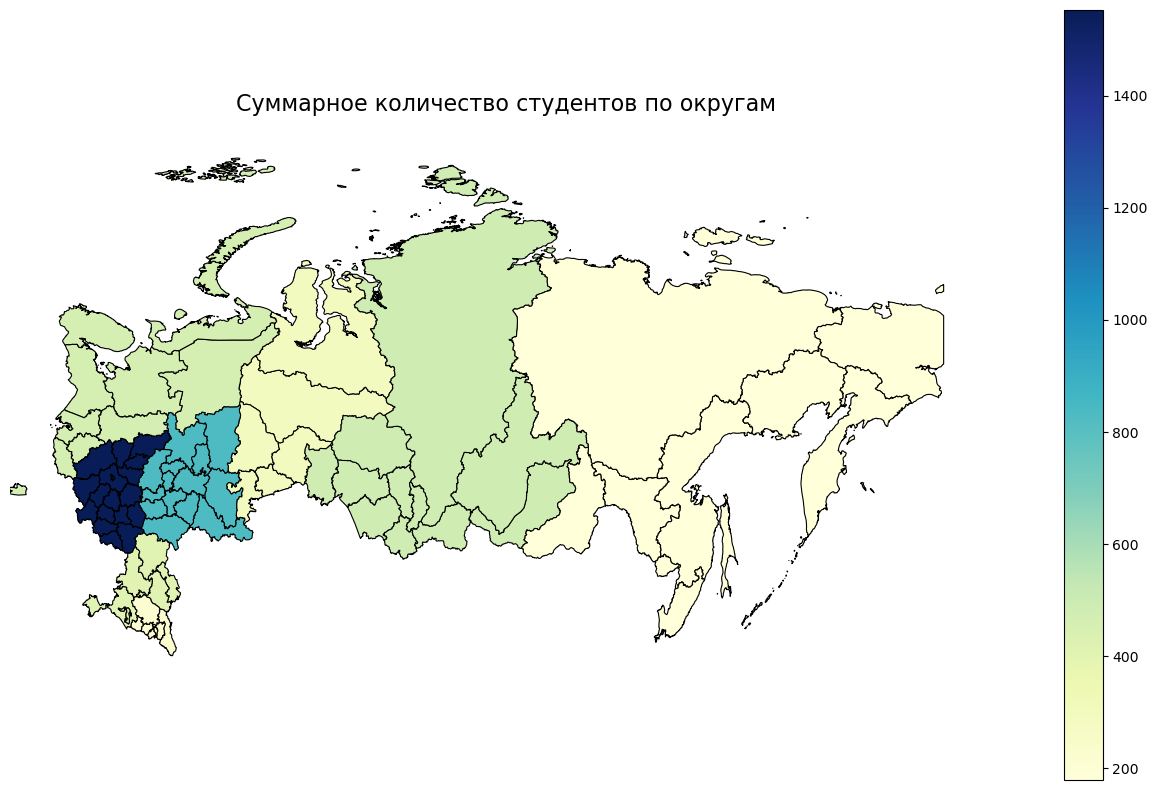

In [17]:
fig, ax = plt.subplots(figsize=(16, 10))

merged.plot(column='fo_stud_all',
            cmap='YlGnBu',
            linewidth=0.8,
            edgecolor='black',
            ax=ax,
            legend=True)

ax.set_title('Суммарное количество студентов по округам', fontsize=16)
ax.axis('off')
ax.set_xlim(20, 190)
ax.set_ylim(40, 85)

In [65]:
# === ОБЫЧНАЯ ЛЕГЕНДА ===
# # квадраты в легенде
# patch_gos = mpatches.Patch(color='royalblue', label='Гос. университеты')
# patch_negos = mpatches.Patch(color='crimson', label='Частные университеты')

# # цифра как маркер
# marker_number = Line2D(
#     [], [], 
#     marker='$402.3$',
#     color='dimgray',
#     linestyle='None',
#     markersize=20,
#     label='Общее число студентов',
# )

# ax.legend(
#     handles=[patch_gos, patch_negos, marker_number],
#     loc='upper left',
#     title='Обозначения',
#     fontsize=9,
#     title_fontsize=10,
#     frameon=True
# )

C:\Users\User\AppData\Local\Temp\ipykernel_22188\1802815276.py:134: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  union = group.geometry.unary_union


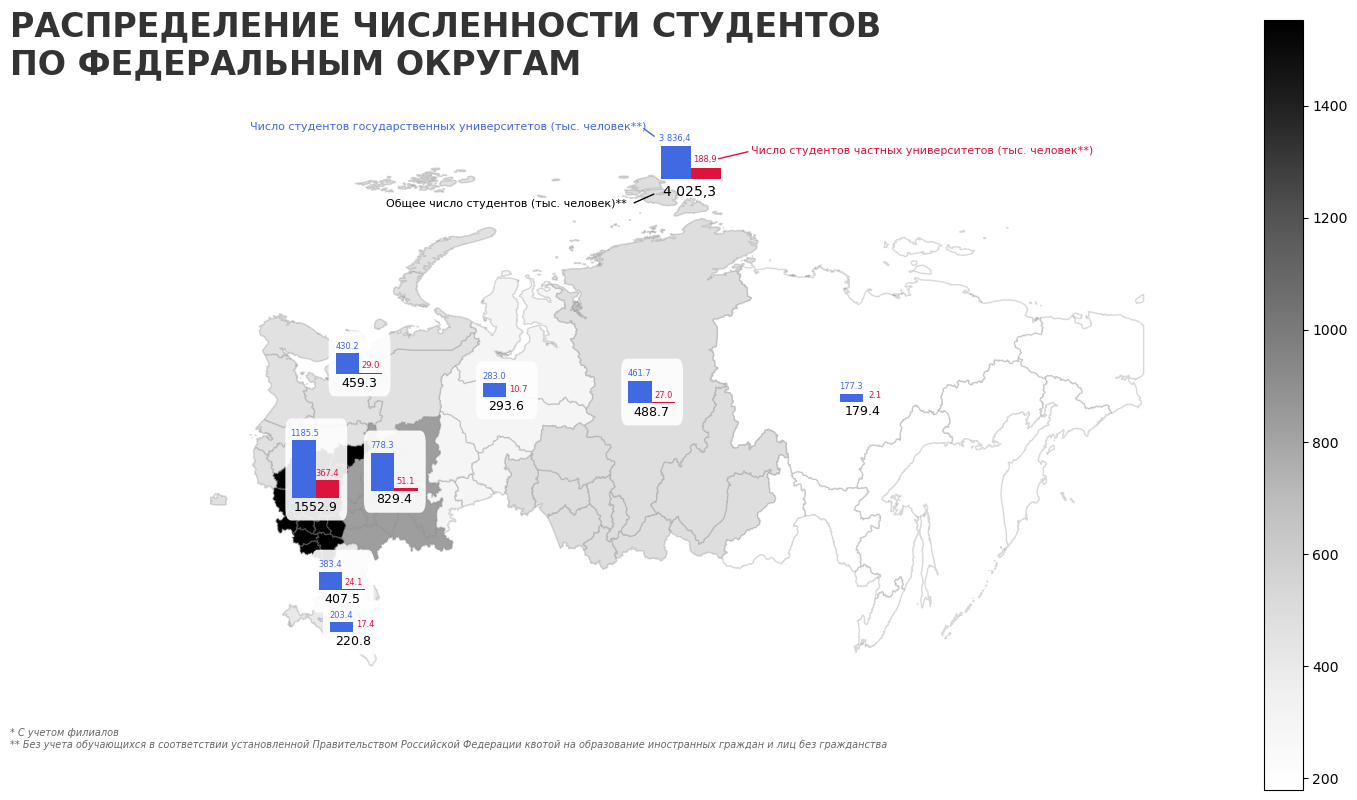

In [98]:
fig, ax = plt.subplots(figsize=(16, 10))

merged.plot(
    column='fo_stud_all',
    cmap='Greys',
    linewidth=1.0,
    edgecolor=(0.5, 0.5, 0.5, 0.3),
    ax=ax,
    legend=True
)

ax.set_xlim(20, 190)
ax.set_ylim(40, 85)
ax.axis('off')
#ax.set_title('Суммарное количество студентов по округам', fontsize=16)

# === ЗАГОЛОВОК ===
fig.text(
    0.00, # вверх или вниз заголовок
    0.89, 
    'РАСПРЕДЕЛЕНИЕ ЧИСЛЕННОСТИ СТУДЕНТОВ\nПО ФЕДЕРАЛЬНЫМ ОКРУГАМ',
    fontsize=24,
    fontweight='bold',
    color='#333333',
    ha='left',
    va='top'
)

# === СНОСКА ===
fig.text(
    0.00, # вверх-вниз
    0.15,
    '* С учетом филиалов\n'
    '** Без учета обучающихся в соответствии установленной Правительством Российской Федерации '
    'квотой на образование иностранных граждан и лиц без гражданства',
    fontsize=7,
    style='italic',
    color='#666666',
    ha='left',
    va='bottom'
)


# === ЛЕГЕНДА НАД КАРТОЙ ===
legend_ax = ax

# Параметры
legend_center_x = 0.5
legend_bottom_y = 0.91
bar_height = 0.06
bar_width = 0.03
bar_spacing = 0.0

x_gos = legend_center_x - bar_width - bar_spacing / 2
x_negos = legend_center_x + bar_spacing / 2

# Бары
legend_ax.bar(x_gos, bar_height, width=bar_width, bottom=legend_bottom_y,
              transform=legend_ax.transAxes, color='royalblue', zorder=10)
legend_ax.bar(x_negos, bar_height * 0.35, width=bar_width, bottom=legend_bottom_y,
              transform=legend_ax.transAxes, color='crimson', zorder=10)

# Цифры над барами (по центру баров)
legend_ax.text(x_gos + bar_width / 2 - 0.017, # здесь двигаем синюю цифру
               legend_bottom_y + bar_height + 0.01,
               '3 836,4', transform=legend_ax.transAxes,
               ha='center', fontsize=6, color='royalblue')

legend_ax.text(x_negos + bar_width / 2- 0.016,  # здесь двигаем красную цифру
               legend_bottom_y + bar_height * 0.35 + 0.01,
               '188,9', transform=legend_ax.transAxes,
               ha='center', fontsize=6, color='crimson')

# сумма
legend_ax.text(legend_center_x - 0.017, # здесь двигаем сумму
               legend_bottom_y - 0.03,
               '4 025,3', transform=legend_ax.transAxes,
               ha='center', fontsize=10, color='black')


# === Подписи ===

legend_ax.text(x_gos - 0.03, legend_bottom_y + bar_height + 0.035,
               'Число студентов государственных университетов (тыс. человек**)',
               transform=legend_ax.transAxes, ha='right', va='center',
               fontsize=8, color='royalblue')

legend_ax.text(x_negos + bar_width + 0.015, legend_bottom_y + bar_height * 0.35 + 0.03,
               'Число студентов частных университетов (тыс. человек**)',
               transform=legend_ax.transAxes, ha='left', va='center',
               fontsize=8, color='crimson')

legend_ax.text(legend_center_x - 0.08, legend_bottom_y - 0.045,
               'Общее число студентов (тыс. человек)**',
               transform=legend_ax.transAxes, ha='right', va='center',
               fontsize=8, color='black')

# === Стрелки ===

legend_ax.annotate('', 
    xy=(x_gos + bar_width / 2 - 0.035, # здесь двигаем синюю стрелку влево-вправо
        legend_bottom_y + bar_height + 0.015), # вверх-вниз
    xytext=(x_gos - 0.035, legend_bottom_y + bar_height + 0.035),
    textcoords='axes fraction', xycoords='axes fraction',
    arrowprops=dict(arrowstyle='-', color='royalblue', lw=1),
    zorder=9
)

legend_ax.annotate('', 
    xy=(x_negos + bar_width / 2 - 0.005, # здесь двигаем красную стрелку влево-вправо
        legend_bottom_y + bar_height * 0.35 + 0.015),  # вверх-вниз
    xytext=(x_negos + bar_width + 0.015, legend_bottom_y + bar_height * 0.35 + 0.03),
    textcoords='axes fraction', xycoords='axes fraction',
    arrowprops=dict(arrowstyle='-', color='crimson', lw=1),
    zorder=9
)

legend_ax.annotate('', 
    xy=(legend_center_x - 0.05, # здесь двигаем стрелку суммы влево-вправо
        legend_bottom_y - 0.025), # вверх-вниз
    xytext=(legend_center_x - 0.075, legend_bottom_y - 0.045),
    textcoords='axes fraction', xycoords='axes fraction',
    arrowprops=dict(arrowstyle='-', color='black', lw=1),
    zorder=9
)

scaling = 0.004
bar_width = 4.0
bar_spacing = 0.0

for fo, group in merged.groupby('fo'):
    
    # центр блока ищем по координате центра округа
    union = group.geometry.unary_union
    x, y = union.centroid.coords[0]

    gos = group['fo_stud_gos_all'].iloc[0]
    negos = group['fo_stud_negos_all'].iloc[0]
    total = group['fo_stud_all'].iloc[0]
    
    # множим параметры баров на коэф-т чтобы помещались на карте и двигаем бары от центра, чтобы не перекрывались
    gos_scaled = gos * scaling
    negos_scaled = negos * scaling

    # блок
    block_x = x - (bar_width + bar_spacing) - 0.9
    block_y = y - 1.5
    block_width = (bar_width + bar_spacing) * 2 + 2
    block_height = max(gos_scaled, negos_scaled) + 3

    # подложка блока
    patch = FancyBboxPatch((block_x, block_y),
                           block_width,
                           block_height,
                           boxstyle="round,pad=0.3,rounding_size=1",
                           #linewidth=0.8,
                           facecolor="white",
                           edgecolor='none',
                           alpha=0.9,
                           zorder=4)
    ax.add_patch(patch)

    x_gos = x - bar_width / 2 - bar_spacing / 2
    x_negos = x + bar_width / 2 + bar_spacing / 2

    # синий
    ax.bar(x_gos, gos_scaled, width=bar_width, bottom=y, color='royalblue', zorder=5)
    ax.text(x_gos, y + gos_scaled + 0.2, f"{gos:.1f}", fontsize=6, ha='center', va='bottom', color='royalblue', zorder=6)

    # красный
    ax.bar(x_negos, negos_scaled, width=bar_width, bottom=y, color='crimson', zorder=5)
    ax.text(x_negos, y + negos_scaled + 0.2, f"{negos:.1f}", fontsize=6, ha='center', va='bottom', color='crimson', zorder=6)

    # сумма
    ax.text(x, y - 0.2, f"{total:.1f}", fontsize=9, ha='center', va='top', zorder=6)

# сохраняем изображение
plt.savefig('map_students_01.png', dpi=300, bbox_inches='tight')